In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

## Importing CSV as DataFrame

In [2]:
# Importing train and test data
X_train = pd.read_csv('C:/Users/S580381/Documents/GitHub/marketing_camp_rev_pred/data/X_train.csv')
y_train = pd.read_csv('C:/Users/S580381/Documents/GitHub/marketing_camp_rev_pred/data/y_train.csv')
X_test = pd.read_csv('C:/Users/S580381/Documents/GitHub/marketing_camp_rev_pred/data/X_test.csv')
y_test = pd.read_csv('C:/Users/S580381/Documents/GitHub/marketing_camp_rev_pred/data/y_test.csv')

In [3]:
X_train.head()

,Impressions,Conversion_Rate,Spent,Clicks,Cpa,Age
0,5117,0.000000,0.000000,0,0.000000,32
1,478480,0.040000,135.750001,75,45.250000,47
2,76355,0.222222,14.630000,9,7.315000,37
3,475184,0.045455,127.320003,88,31.830001,37
4,208572,0.055556,60.760000,36,30.380000,42


## Our data is encoded, standarized, relevant features are selected, and dataset is split into train and test splits. Now we'll start building our models.

In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

Creating an Evaluate function to evaluate all the metrics after model training.

In [5]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = sqrt(mse)
    r2 = r2_score(true, predicted)
    
    return mae, mse, rmse, r2

In [13]:
models = {
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Extra Trees': ExtraTreesRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, eval_metric='mae'),
    'LightGBM': LGBMRegressor(random_state=42)
}

model_list = []
r2_list = []

for i in range(len(models)):
    model = list(models.values())[i]
    model_name = list(models.keys())[i]
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predictions 
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evalute Train and Test set
    mae_train, mse_train, rmse_train, r2_train = evaluate_model(y_train, y_train_pred)
    mae_test, mse_test, rmse_test, r2_test = evaluate_model(y_test, y_test_pred)
    
    # Append results to lists
    print(list(models.keys())[i])
    model_list.append(model_name)
    
    print("Model performance on Train set:")
    print(f"MAE: {mae_train:.4f}")
    print(f"MSE: {mse_train:.4f}")
    print(f"RMSE: {rmse_train:.4f}")
    print(f"R2: {r2_train:.4f}")
    
    print('-------------------------------------')
    
    print("Model performance on Test set:")
    print(f"MAE: {mae_test:.4f}")
    print(f"MSE: {mse_test:.4f}")
    print(f"RMSE: {rmse_test:.4f}")
    print(f"R2: {r2_test:.4f}")
    
    r2_list.append(r2_test)
    
    print('='*40)
    print('\n')

Decision Tree
Model performance on Train set:
MAE: 0.0000
MSE: 0.0000
RMSE: 0.0000
R2: 1.0000
-------------------------------------
Model performance on Test set:
MAE: 0.5022
MSE: 2.0480
RMSE: 1.4311
R2: 0.8915




c:\Users\S580381\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest
Model performance on Train set:
MAE: 0.1483
MSE: 0.2746
RMSE: 0.5240
R2: 0.9865
-------------------------------------
Model performance on Test set:
MAE: 0.2234
MSE: 0.6057
RMSE: 0.7783
R2: 0.9679


Extra Trees
Model performance on Train set:
MAE: 0.0000
MSE: 0.0000
RMSE: 0.0000
R2: 1.0000
-------------------------------------
Model performance on Test set:
MAE: 0.1372
MSE: 0.2168
RMSE: 0.4656
R2: 0.9885




c:\Users\S580381\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\S580381\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Gradient Boosting
Model performance on Train set:
MAE: 0.2227
MSE: 0.1372
RMSE: 0.3704
R2: 0.9933
-------------------------------------
Model performance on Test set:
MAE: 0.3431
MSE: 0.4968
RMSE: 0.7049
R2: 0.9737


XGBoost
Model performance on Train set:
MAE: 0.0168
MSE: 0.0030
RMSE: 0.0544
R2: 0.9999
-------------------------------------
Model performance on Test set:
MAE: 0.2650
MSE: 0.5833
RMSE: 0.7637
R2: 0.9691


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000064 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 967
[LightGBM] [Info] Number of data points in the train set: 914, number of used features: 6
[LightGBM] [Info] Start training from score 2.878556
LightGBM
Model performance on Train set:
MAE: 0.2512
MSE: 1.3110
RMSE: 1.1450
R2: 0.9357
-------------------------------------
Model performance on Test set:
MAE: 0.2947
MSE: 0.6388
RMSE: 0.7993
R2: 0.9661




In [57]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model', 'R2']).sort_values(by='R2', ascending=False).reset_index(drop=True)

,Model,R2
0,Extra Trees,0.988513
1,Gradient Boosting,0.973671
2,XGBoost,0.969091
3,Random Forest,0.967899
4,LightGBM,0.966147
5,Decision Tree,0.891467


We can see that the model performed very well overall. At first sight, we could think that data leakage is present due to the high R2 scores, but we made sure the encode and select features based on the X_train data. One reason that could be possibile is that we did not scale the our data.

In [58]:
# Looking at a linear model score to compare
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print("R²:", model.score(X_test, y_test))

R²: 0.8610625679394658


We can see that even if our data is not linear as we established, the R2 score of the Linear Model is still decent. That doesn't mean that our data is linear, but simply that there is a high correlation between some features in our data set and target.

In [60]:
import numpy as np

y_shuffled = np.random.permutation(y_train)
model.fit(X_train, y_shuffled[:len(X_train)])
print(model.score(X_test, y_test))  # Should be near 0 or negative


-0.006502760622010273


R2 score when the target is shuffled is negative, which means that the model doesn't learn anything useful when the target is randomized, meaning no data leakage detected.  

## We will use a GridSearchCV on Decision Trees and Extra Trees models to dinf the best parameters to avoid overfitting the models.

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
# Grid Search for Decision Tree Regressor
dtr = DecisionTreeRegressor(random_state=42)

dtr_param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

dtr_grid = GridSearchCV(dtr, dtr_param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
dtr_grid.fit(X_train, y_train)

print("Best DecisionTree Params:", dtr_grid.best_params_)
print("Best DecisionTree R²:", dtr_grid.best_score_)


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best DecisionTree Params: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best DecisionTree R²: 0.8159912719520053


c:\Users\S580381\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
180 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\S580381\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\S580381\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  Fil

In [63]:
# Grid Search for Extra Trees Regressor
etr = ExtraTreesRegressor(random_state=42)

etr_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4],
    'max_features': ['sqrt', 'log2']
}

etr_grid = GridSearchCV(etr, etr_param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
etr_grid.fit(X_train, y_train)

print("Best ExtraTrees Params:", etr_grid.best_params_)
print("Best ExtraTrees R²:", etr_grid.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best ExtraTrees Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best ExtraTrees R²: 0.910177167638939


c:\Users\S580381\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Testing the models with the new parameters

In [64]:
best_dtr_params = dtr_grid.best_params_
best_etr_params = etr_grid.best_params_

# Final Decision Tree Model
final_dtr = DecisionTreeRegressor(**best_dtr_params, random_state=42)
final_dtr.fit(X_train, y_train)

# Final Extra Trees Model
final_etr = ExtraTreesRegressor(**best_etr_params, random_state=42)
final_etr.fit(X_train, y_train)

c:\Users\S580381\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


ExtraTreesRegressor(max_features='sqrt', random_state=42)

In [65]:
models_best_param = {
    'Final Decision Tree': final_dtr,
    'Final Extra Trees': final_etr
}

for name, model in models_best_param.items():
    print(f"📊 {name} Evaluation")
    
    # Train set evaluation
    train_preds = model.predict(X_train)
    mae_train, mse_train, rmse_train, r2_train = evaluate_model(y_train, train_preds)
    
    print("Model performance on Train set:")
    print(f"MAE: {mae_train:.4f}")
    print(f"MSE: {mse_train:.4f}")
    print(f"RMSE: {rmse_train:.4f}")
    print(f"R2: {r2_train:.4f}")
    
    print('-------------------------------------')
    
    # Test set evaluation
    test_preds = model.predict(X_test)
    mae_test, mse_test, rmse_test, r2_test = evaluate_model(y_test, test_preds)
    
    print("Model performance on Test set:")
    print(f"MAE: {mae_test:.4f}")
    print(f"MSE: {mse_test:.4f}")
    print(f"RMSE: {rmse_test:.4f}")
    print(f"R2: {r2_test:.4f}")
    
    print("=" * 40)


📊 Final Decision Tree Evaluation
Model performance on Train set:
MAE: 0.0802
MSE: 0.0426
RMSE: 0.2063
R2: 0.9979
-------------------------------------
Model performance on Test set:
MAE: 0.6205
MSE: 3.3430
RMSE: 1.8284
R2: 0.8228
📊 Final Extra Trees Evaluation
Model performance on Train set:
MAE: 0.0000
MSE: 0.0000
RMSE: 0.0000
R2: 1.0000
-------------------------------------
Model performance on Test set:
MAE: 0.2011
MSE: 0.2903
RMSE: 0.5388
R2: 0.9846


We can see that both models are still overfitting despite doing a Grid Search, which means that this is just as good as our metrics will get, since these models are very high variance. For simplicity, we will not include them in our future steps.

In [66]:
# Removind Decision Tree and Extra Trees from the models dictionary
models.pop('Decision Tree', None)
models.pop('Extra Trees', None)

print(models.keys())

dict_keys(['Random Forest', 'Gradient Boosting', 'XGBoost', 'LightGBM'])


## Gradient Bossting

In [71]:
gbr =  GradientBoostingRegressor(random_state=42)
gbr = gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is: %.2f" %score)

Accuracy of the model is: 97.37


c:\Users\S580381\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


## Plot y pred and y test

Text(0, 0.5, 'Predictions')

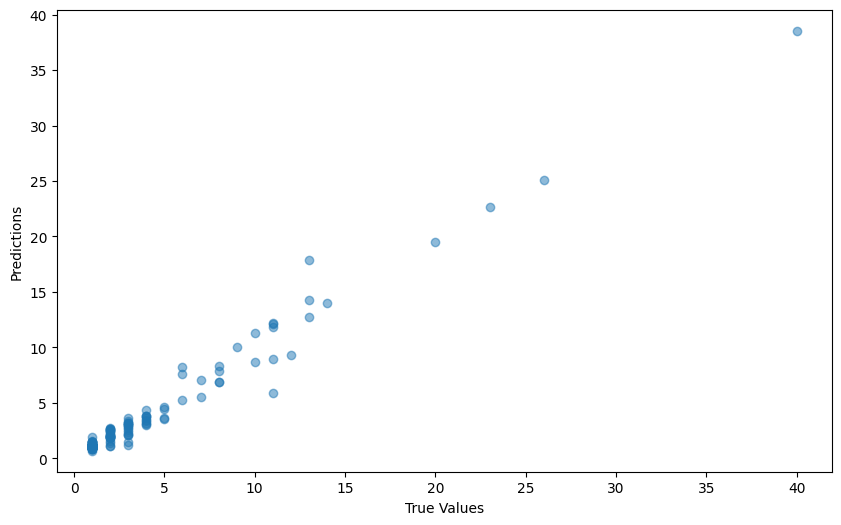

In [74]:
# Plot y pred vs y_test
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')

Difference between Actual and Predicted values 

In [76]:
# Difference between actual and predicted values
pred_df = pd.DataFrame({'Acutal: y_test': y_test, 'Predicted: y_pred': y_pred, 'Difference': y_test - y_pred})
pred_df 

ValueError: Unable to coerce to Series, length must be 1: given 229